In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Using pandas set_option to display the total number of columns in our data sets 
pd.set_option('display.max_columns', None)

In [69]:
#For the sake of this data cleaning exercise, we will be woring with the first FIFA data(df)
df = pd.read_csv(r'C:\\Users\\user\\Desktop/Data Science/Data Cleaning/fifa21 raw data v2.csv', low_memory = False)
dp = pd.read_csv(r"C:\Users\user\Desktop\Data Science\Data Cleaning\fifa21_raw_data.csv", low_memory = False)

<font size = +1>Data Description for the FIFA files</font>

Here is a brief documentation for each column name in the given dataset:

photoUrl: The URL of the player's photo.

LongName: The full name of the player.

playerUrl: The URL of the player's page on sofifa.com.

Nationality: The nationality of the player.

Positions: The positions the player can play.

Name: The short name of the player.

Age: The age of the player.

OVA: The overall rating of the player in FIFA 21.

POT: The potential rating of the player in FIFA 21.

Team & Contract: The team the player is playing for in FIFA 21, along with their contract details.

ID: The unique identifier for the player.

Height: The height of the player in feet and inches.

Weight: The weight of the player in pounds.

foot: The preferred foot of the player.

BOV: The best overall rating the player has achieved in their career.

BP: The best position the player has played in their career.

Growth: The difference between the potential rating and overall rating of the player.

Joined: The date the player joined their current team in FIFA 21.

Loan Date End: The date the player's loan contract ends.

Value: The market value of the player in FIFA 21.

Wage: The weekly wage of the player in FIFA 21.

Release Clause: The release clause value of the player in FIFA 21.

Attacking: The attacking attributes of the player.

Crossing: The crossing attribute of the player.

Finishing: The finishing attribute of the player.

Heading Accuracy: The heading accuracy attribute of the player.

Short Passing: The short passing attribute of the player.

Volleys: The volleys attribute of the player.

Skill: The skill attributes of the player.

Dribbling: The dribbling attribute of the player.

Curve: The curve attribute of the player.

FK Accuracy: The free kick accuracy attribute of the player.

Long Passing: The long passing attribute of the player.

Ball Control: The ball control attribute of the player.

Movement: The movement attributes of the player.

Acceleration: The acceleration attribute of the player.

Sprint Speed: The sprint speed attribute of the player.

Agility: The agility attribute of the player.

Reactions: The reactions attribute of the player.

Balance: The balance attribute of the player.

Power: The power attributes of the player.

Shot Power: The shot power attribute of the player.

Jumping: The jumping attribute of the player.

Stamina: The stamina attribute of the player.

Strength: The strength attribute of the player.

Long Shots: The long shots attribute of the player.

Mentality: The mentality attributes of the player.

Aggression: The aggression attribute of the player.

Interceptions: The interceptions attribute of the player.

Positioning: The positioning attribute of the player.

Vision: The vision attribute of the player.

Penalties: The penalties attribute of the player.

Composure: The composure attribute of the player.

Defending: The defending attributes of the player.

Marking: The marking attribute of the player.

Standing Tackle: The standing tackle attribute of the player.

Sliding Tackle: The sliding tackle attribute of the player.

Goalkeeping: The goalkeeping attributes of the player.

GK Diving: The goalkeeper diving attribute of the player.

GK Handling: The goalkeeper handling attribute of the player.

GK Kicking: The goalkeeper kicking attribute of the player.

GK Positioning: The goalkeeper positioning attribute of the player.

GK Reflexes: This refers to the goalkeeper's ability to react and make saves quickly.

Total Stats: This refers to the overall rating of the player based on their performance in all areas of the game.

Base Stats: This refers to the player's rating in the six main areas of the game: Pace, Shooting, Passing, Dribbling, Defending, and Physicality.

W/F: This refers to the player's weaker foot ability.

SM: This refers to the player's skill moves ability.

A/W: This refers to the player's attacking work rate. It measures how frequently the player participates in attacking actions, such as making runs or positioning themselves in the opponent's half.

D/W: This refers to the player's defensive work rate. It measures how frequently the player participates in defensive actions, such as tracking back or making tackles.

IR: This refers to the player's injury resistance. It measures the player's ability to avoid injuries and how quickly they recover from them.

PAC: This refers to the player's pace or speed attribute. It measures how quickly the player can move with and without the ball.

SHO: This refers to the player's shooting ability. It measures the player's accuracy and power when shooting the ball.

PAS: This refers to the player's passing ability. It measures the player's accuracy and range when passing the ball.

DRI: This refers to the player's dribbling ability. It measures the player's agility, balance, and ball control when dribbling the ball.

DEF: This refers to the player's defensive ability. It measures the player's ability to tackle, intercept, and defend against opposing players.

PHY: This refers to the player's physicality or strength. It measures the player's ability to win physical battles and maintain possession of the ball.

Hits: This refers to the number of times the player's profile has been viewed on the website.



In [4]:
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


In [5]:
dp.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,158023,"5'7""",159lbs,Left,93,RW,0,"Jul 1, 2004",NaN,€67.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,20801,"6'2""",183lbs,Right,92,ST,0,"Jul 10, 2018",NaN,€46M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,200389,"6'2""",192lbs,Right,91,GK,2,"Jul 16, 2014",NaN,€75M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,192985,"5'11""",154lbs,Right,91,CAM,0,"Aug 30, 2015",NaN,€87M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,190871,"5'9""",150lbs,Right,91,LW,0,"Aug 3, 2017",NaN,€90M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,\n273


**<font size = +1> Data Cleaning Steps</font>**

Data cleaning is a crucial step in the data analysis process that involves identifying and correcting errors, inconsistencies, and missing values in a dataset. Here are some general steps we will follow when performing the FIFA 2021 data cleaning:

1.Identify the data quality issues

2.Remove duplicates

3.Handle missing values

4.Standardize data format

5.Check for outliers

6.Document data cleaning steps

By following these general steps(not in particular order), we can perform effective data cleaning that will help you get better insights from your data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

In [7]:
df.shape

(18979, 77)

In [8]:
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


In [9]:
#Displaying the columns and the sum of the null values in them, this way we know our columns with null values and their total count
s = pd.Series([df[i].isnull().sum() for i in df.columns], index = df.columns).sort_values(ascending = False)
print(s)

Loan Date End       17966
Hits                 2595
GK Diving               0
Sliding Tackle          0
Standing Tackle         0
                    ...  
Heading Accuracy        0
Finishing               0
Crossing                0
Attacking               0
Reactions               0
Length: 77, dtype: int64


Copy the data into different variable so we can begin cleaning.

In [10]:
df1 = df.copy()

In [11]:
df1.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


In [12]:
#Using the string attribute replace to remove values or symbols froom our data, this will be done in many places
df1['Height'] = df1['Height'].str.replace('cm', '')

In [13]:
df1['Height'].unique()

array(['170', '187', '188', '181', '175', '184', '191', '178', '193',
       '185', '199', '173', '168', '176', '177', '183', '180', '189',
       '179', '195', '172', '182', '186', '192', '165', '194', '167',
       '196', '163', '190', '174', '169', '171', '197', '200', '166',
       '6\'2"', '164', '198', '6\'3"', '6\'5"', '5\'11"', '6\'4"',
       '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"', '5\'4"',
       '201', '158', '162', '161', '160', '203', '157', '156', '202',
       '159', '206', '155'], dtype=object)

In [14]:
df1['Height'] = df1['Height'].str.replace('5\'4"','163')
df1['Height'] = df1['Height'].str.replace('5\'6"','168')
df1['Height'] = df1['Height'].str.replace('5\'7"','170')
df1['Height'] = df1['Height'].str.replace('5\'9"','175')
df1['Height'] = df1['Height'].str.replace('5\'10"','178')
df1['Height'] = df1['Height'].str.replace('5\'11"','180')
df1['Height'] = df1['Height'].str.replace('6\'0"','183')
df1['Height'] = df1['Height'].str.replace('6\'1"','185')
df1['Height'] = df1['Height'].str.replace('6\'2"','188')
df1['Height'] = df1['Height'].str.replace('6\'3"','191')
df1['Height'] = df1['Height'].str.replace('6\'4"','193')
df1['Height'] = df1['Height'].str.replace('6\'5"','196')

In [15]:
df1['Height'].unique()

array(['170', '187', '188', '181', '175', '184', '191', '178', '193',
       '185', '199', '173', '168', '176', '177', '183', '180', '189',
       '179', '195', '172', '182', '186', '192', '165', '194', '167',
       '196', '163', '190', '174', '169', '171', '197', '200', '166',
       '164', '198', '201', '158', '162', '161', '160', '203', '157',
       '156', '202', '159', '206', '155'], dtype=object)

In [16]:
df1.Weight.unique()

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       '58kg', '183lbs', '179lbs', '172lbs', '196lbs', '176lbs', '185lbs',
       '170lbs', '203lbs', '168lbs', '161lbs', '146lbs', '130lbs',
       '190lbs', '174lbs', '148lbs', '165lbs', '159lbs', '192lbs',
       '181lbs', '139lbs', '154lbs', '157lbs', '163lbs', '98kg', '103kg',
       '99kg', '102kg', '56kg', '101kg', '57kg', '55kg', '104kg', '107kg',
       '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

In [17]:
import re

In [18]:
#Write a function that converts the weight of players into kg
def check_lbs(Weight):
    weight_kg = []
    for x in Weight:
        #Using RE to search for values with lbs, a boolean value is return if present or absent
        y = re.search('lbs',x)
        if y:
            #RE is used to substitute the lbs from the value and replace it with null value
            z = re.sub('lbs', '', x)
            z = float(z)
            kg = z * 0.454
            weight_kg.append(int(kg))
        else:
            z = re.sub('kg', '', x)
            z = float(z)
            weight_kg.append(int(z))
    return weight_kg

In [19]:
df1['Weight'] = check_lbs(df1.Weight)

In [20]:
df1['Weight'].unique()

array([ 72,  83,  87,  70,  68,  80,  71,  91,  73,  85,  92,  69,  84,
        96,  81,  82,  75,  86,  89,  74,  76,  64,  78,  90,  66,  60,
        94,  79,  67,  65,  59,  61,  93,  88,  97,  77,  62,  63,  95,
       100,  58,  98, 103,  99, 102,  56, 101,  57,  55, 104, 107, 110,
        53,  50,  54,  52], dtype=int64)

In [21]:
df1['Value'].unique()

array(['€103.5M', '€63M', '€120M', '€129M', '€132M', '€111M', '€120.5M',
       '€102M', '€185.5M', '€110M', '€113M', '€90.5M', '€82M', '€17.5M',
       '€83.5M', '€33.5M', '€114.5M', '€78M', '€103M', '€109M', '€92M',
       '€10M', '€76.5M', '€89.5M', '€87.5M', '€79.5M', '€124M', '€114M',
       '€95M', '€92.5M', '€105.5M', '€88.5M', '€85M', '€81.5M', '€26M',
       '€21M', '€56M', '€67.5M', '€53M', '€36.5M', '€51M', '€65.5M',
       '€46.5M', '€61.5M', '€72.5M', '€77.5M', '€43.5M', '€32.5M', '€36M',
       '€32M', '€54M', '€49.5M', '€57M', '€66.5M', '€74.5M', '€71.5M',
       '€121M', '€99M', '€67M', '€86.5M', '€93.5M', '€70M', '€62M',
       '€66M', '€58M', '€44M', '€81M', '€37M', '€14.5M', '€46M', '€47.5M',
       '€52.5M', '€54.5M', '€34.5M', '€57.5M', '€51.5M', '€44.5M', '€55M',
       '€48M', '€60.5M', '€63.5M', '€61M', '€29M', '€58.5M', '€55.5M',
       '€42M', '€40.5M', '€43M', '€45.5M', '€34M', '€26.5M', '€42.5M',
       '€35.5M', '€45M', '€41.5M', '€40M', '€11M', '€13.5M', '

In [22]:
df1['Wage'].unique()

array(['€560K', '€220K', '€125K', '€370K', '€270K', '€240K', '€250K',
       '€160K', '€260K', '€210K', '€310K', '€130K', '€350K', '€300K',
       '€190K', '€145K', '€195K', '€100K', '€140K', '€290K', '€82K',
       '€110K', '€230K', '€155K', '€200K', '€165K', '€95K', '€170K',
       '€105K', '€115K', '€150K', '€135K', '€55K', '€58K', '€81K', '€34K',
       '€120K', '€59K', '€90K', '€65K', '€56K', '€71K', '€18K', '€75K',
       '€47K', '€20K', '€84K', '€86K', '€74K', '€78K', '€27K', '€68K',
       '€85K', '€25K', '€46K', '€83K', '€54K', '€79K', '€175K', '€43K',
       '€49K', '€45K', '€38K', '€41K', '€39K', '€23K', '€51K', '€50K',
       '€87K', '€30K', '€14K', '€69K', '€31K', '€64K', '€53K', '€35K',
       '€21K', '€28K', '€17K', '€33K', '€70K', '€32K', '€89K', '€26K',
       '€40K', '€76K', '€72K', '€48K', '€36K', '€29K', '€60K', '€16K',
       '€37K', '€24K', '€52K', '€0', '€62K', '€73K', '€63K', '€19K',
       '€1K', '€66K', '€80K', '€12K', '€2K', '€42K', '€13K', '€900',
       '€5

In [23]:
#Convert the currency figures from abbreviated values to whole numbers.
def convert_currency(amount):
    amount = amount.replace('€','')
    if 'M' in amount:
        amount = float(amount.replace('M','')) * 1000000
    elif 'K' in amount:
        amount = float(amount.replace('K','')) * 1000
    else:
        amount = float(amount)
    return int(amount)

In [24]:
df1['Value'] = df1['Value'].apply(convert_currency)
df1['Wage'] = df1['Wage'].apply(convert_currency)

In [25]:
df1[['Value', 'Wage']].head(10)

,Value,Wage
0,103500000,560000
1,63000000,220000
2,120000000,125000
3,129000000,370000
4,132000000,270000
5,111000000,240000
6,120500000,250000
7,102000000,160000
8,185500000,160000
9,110000000,260000


In [26]:
#Renaming the values in our datasets, the name will have in brackets the unit of the values in the column i.e for numbers.
df1 = df1.rename(columns={'Height':'Height(CM)', 'Weight':'Weight(Kg)','Value':'Value(€)','Wage':'Wage(€)','Release Clause':'Release Clause(€)','W/F':'W/F(★)','SM':'SM(★)','IR':'IR(★)'})

In [27]:
df1.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height(CM),Weight(Kg),Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value(€),Wage(€),Release Clause(€),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F(★),SM(★),A/W,D/W,IR(★),PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170,72,Left,93,RW,"Jul 1, 2004",NaN,103500000,560000,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187,83,Right,92,ST,"Jul 10, 2018",NaN,63000000,220000,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188,87,Right,91,GK,"Jul 16, 2014",NaN,120000000,125000,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181,70,Right,91,CAM,"Aug 30, 2015",NaN,129000000,370000,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175,68,Right,91,LW,"Aug 3, 2017",NaN,132000000,270000,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


In [28]:
df1['W/F(★)'] = df1['W/F(★)'].str.replace('★','')
df1['SM(★)'] = df1['SM(★)'].str.replace('★','')

In [29]:
df1.Joined[:20]

0      Jul 1, 2004
1     Jul 10, 2018
2     Jul 16, 2014
3     Aug 30, 2015
4      Aug 3, 2017
5      Jul 1, 2014
6      Jul 1, 2017
7     Jul 19, 2018
8      Jul 1, 2018
9      Jul 1, 2014
10     Jan 1, 2018
11     Jul 1, 2016
12    Jul 11, 2013
13     Aug 9, 2018
14     Jul 1, 2011
15     Jul 9, 2009
16     Aug 1, 2005
17    Jul 28, 2011
18    Jul 14, 2015
19    Jul 16, 2016
Name: Joined, dtype: object

In [30]:
df1['Joined'] = pd.to_datetime(df1['Joined'], format = '%b %d, %Y')
df1['Joined'] = df1['Joined'].dt.strftime('%Y/%m/%d')

In [31]:
df1['Joined'].loc[150:200]

150    2020/09/14
151    2020/01/29
152    2015/06/20
153    2015/04/29
154    2020/09/02
155    2019/07/10
156    2018/06/09
157    2019/07/01
158    2016/07/22
159    2018/07/02
160    2016/08/03
161    2016/08/31
162    2018/01/31
163    2012/08/09
164    2019/05/17
165    2012/09/13
166    2015/02/02
167    2019/08/07
168    2015/08/11
169    2018/08/31
170    2011/08/16
171    2016/07/12
172    2018/07/16
173    2019/07/07
174    2014/07/01
175    2020/01/17
176    2019/07/01
177    2020/09/23
178    2019/07/12
179    2018/07/03
180    2020/08/13
181    2019/07/17
182    2013/07/01
183    2011/07/01
184    2015/08/13
185    2016/07/01
186    2018/07/23
187    2017/07/05
188    2015/02/02
189    2019/07/02
190    2018/07/01
191    2009/08/01
192    2018/01/06
193    2017/01/01
194    2015/01/21
195    2018/07/11
196    2016/07/01
197    2019/08/07
198    2019/01/15
199    2018/07/02
200    2020/09/05
Name: Joined, dtype: object

In [32]:
df1['Club'].head()

0           \n\n\n\nFC Barcelona
1               \n\n\n\nJuventus
2        \n\n\n\nAtlético Madrid
3        \n\n\n\nManchester City
4    \n\n\n\nParis Saint-Germain
Name: Club, dtype: object

In [33]:
df1['Club'] = df1.Club.str.replace('\n', '')

In [34]:
df1['Club'].head()

0           FC Barcelona
1               Juventus
2        Atlético Madrid
3        Manchester City
4    Paris Saint-Germain
Name: Club, dtype: object

In [35]:
df1['Contract'] = df1['Contract'].str.replace('~', '-')
df1['Contract'].loc[:20]

0     2004 - 2021
1     2018 - 2022
2     2014 - 2023
3     2015 - 2023
4     2017 - 2022
5     2014 - 2023
6     2017 - 2023
7     2018 - 2024
8     2018 - 2022
9     2014 - 2022
10    2018 - 2023
11    2016 - 2023
12    2013 - 2023
13    2018 - 2024
14    2011 - 2023
15    2009 - 2022
16    2005 - 2021
17    2011 - 2021
18    2015 - 2023
19    2016 - 2023
20    2015 - 2023
Name: Contract, dtype: object

In [36]:
df1['Hits'].unique()

array(['771', '562', '150', '207', '595', '248', '246', '120', '1.6K',
       '130', '321', '189', '175', '96', '118', '216', '212', '154',
       '205', '202', '339', '408', '103', '332', '86', '173', '161',
       '396', '1.1K', '433', '242', '206', '177', '1.5K', '198', '459',
       '117', '119', '209', '84', '187', '165', '203', '65', '336', '126',
       '313', '124', '145', '538', '182', '101', '45', '377', '99', '194',
       '403', '414', '593', '374', '245', '3.2K', '266', '299', '309',
       '215', '265', '211', '112', '337', '70', '159', '688', '116', '63',
       '144', '123', '71', '224', '113', '168', '61', '89', '137', '278',
       '75', '148', '176', '197', '264', '214', '247', '402', '440',
       '1.7K', '2.3K', '171', '320', '657', '87', '259', '200', '255',
       '253', '196', '60', '97', '85', '169', '256', '132', '239', '166',
       '121', '109', '32', '46', '122', '48', '527', '199', '282', '51',
       '1.9K', '642', '155', '323', '288', '497', '509', '79',

In [37]:
df1['Hits'] = df1['Hits'].fillna(0)

In [38]:
#Function to convert the Hit column values containing abbreviated values of thousands written as 'K'
def con_hits(value):
    value = str(value)
    amount = 0
    if 'k' in value:
        amount = float(value.replace('k', '')) * 1000
    elif 'K' in value:
        amount = float(value.replace('K', '')) * 1000
    else:
        amount = float(value)
    return int(amount)

In [39]:
df1['Hits']  = df1['Hits'].apply(con_hits)

In [40]:
df1['Hits'].astype(int).unique()

array([ 771,  562,  150,  207,  595,  248,  246,  120, 1600,  130,  321,
        189,  175,   96,  118,  216,  212,  154,  205,  202,  339,  408,
        103,  332,   86,  173,  161,  396, 1100,  433,  242,  206,  177,
       1500,  198,  459,  117,  119,  209,   84,  187,  165,  203,   65,
        336,  126,  313,  124,  145,  538,  182,  101,   45,  377,   99,
        194,  403,  414,  593,  374,  245, 3200,  266,  299,  309,  215,
        265,  211,  112,  337,   70,  159,  688,  116,   63,  144,  123,
         71,  224,  113,  168,   61,   89,  137,  278,   75,  148,  176,
        197,  264,  214,  247,  402,  440, 1700, 2300,  171,  320,  657,
         87,  259,  200,  255,  253,  196,   60,   97,   85,  169,  256,
        132,  239,  166,  121,  109,   32,   46,  122,   48,  527,  199,
        282,   51, 1900,  642,  155,  323,  288,  497,  509,   79,   49,
        270,  511,   80,  128,  115,  156,  204,  143,  140,  152,  220,
        134,  225,   94,   74,  135,  142,   50,   

In [41]:
df1['Hits'].dtypes

dtype('int64')

In [42]:
df1['Contract'].unique()

array(['2004 - 2021', '2018 - 2022', '2014 - 2023', '2015 - 2023',
       '2017 - 2022', '2017 - 2023', '2018 - 2024', '2014 - 2022',
       '2018 - 2023', '2016 - 2023', '2013 - 2023', '2011 - 2023',
       '2009 - 2022', '2005 - 2021', '2011 - 2021', '2015 - 2022',
       '2017 - 2024', '2010 - 2024', '2012 - 2021', '2019 - 2024',
       '2015 - 2024', '2017 - 2025', '2020 - 2025', '2019 - 2023',
       '2008 - 2023', '2015 - 2021', '2020 - 2022', '2012 - 2022',
       '2016 - 2025', '2013 - 2022', '2011 - 2022', '2012 - 2024',
       '2016 - 2021', '2012 - 2023', '2008 - 2022', '2019 - 2022',
       '2017 - 2021', '2013 - 2024', '2020 - 2024', '2010 - 2022',
       '2020 - 2021', '2011 - 2024', '2020 - 2023', '2014 - 2024',
       '2013 - 2026', '2016 - 2022', '2010 - 2021', '2013 - 2021',
       '2019 - 2025', '2018 - 2025', '2016 - 2024', '2018 - 2021',
       '2009 - 2024', '2007 - 2022', 'Jun 30, 2021 On Loan',
       '2009 - 2021', '2019 - 2021', '2019 - 2026', 'Free', '2012 - 

In [43]:
df1['Loan Date End'].unique()

array([nan, 'Jun 30, 2021', 'Dec 31, 2020', 'Jan 30, 2021',
       'Jun 30, 2022', 'May 31, 2021', 'Jul 5, 2021', 'Dec 31, 2021',
       'Jul 1, 2021', 'Jan 1, 2021', 'Aug 31, 2021', 'Jan 31, 2021',
       'Dec 30, 2021', 'Jun 23, 2021', 'Jan 3, 2021', 'Nov 27, 2021',
       'Jan 17, 2021', 'Jun 30, 2023', 'Jul 31, 2021', 'Nov 22, 2020',
       'May 31, 2022', 'Dec 30, 2020', 'Jan 4, 2021', 'Nov 30, 2020',
       'Aug 1, 2021'], dtype=object)

In [44]:
df1.loc[df['Loan Date End'].notnull()]

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height(CM),Weight(Kg),Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value(€),Wage(€),Release Clause(€),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F(★),SM(★),A/W,D/W,IR(★),PAC,SHO,PAS,DRI,DEF,PHY,Hits
205,173731,G. Bale,Gareth Bale,https://cdn.sofifa.com/players/173/731/21_60.png,http://sofifa.com/player/173731/gareth-bale/21...,Wales,30,83,83,Tottenham Hotspur,"Jun 30, 2021 On Loan",RW,185,82,Left,83,RW,2013/09/01,"Jun 30, 2021",35000000,200000,€0,417,87,81,84,80,85,419,80,90,87,79,83,397,86,89,78,79,65,405,90,82,69,77,87,362,65,59,83,79,76,85,161,54,55,52,52,15,15,11,5,6,2213,465,3,4,Medium,Medium,4 ★,88,84,82,80,58,73,282
248,193105,A. Areola,Alphonse Areola,https://cdn.sofifa.com/players/193/105/21_60.png,http://sofifa.com/player/193105/alphonse-areol...,France,27,82,86,Fulham,"Jun 30, 2021 On Loan",GK,195,94,Right,82,GK,2010/07/01,"Jun 30, 2021",32000000,71000,€0,117,20,19,14,48,16,103,12,16,16,37,22,305,56,54,58,79,58,264,60,72,38,80,14,142,26,23,17,51,25,64,43,13,18,12,406,85,79,80,78,84,1380,461,3,1,Medium,Medium,2 ★,85,79,80,84,55,78,94
254,200888,Danilo Pereira,Danilo Luís Hélio Pereira,https://cdn.sofifa.com/players/200/888/21_60.png,http://sofifa.com/player/200888/danilo-luis-he...,Portugal,28,82,82,Paris Saint-Germain,"Jun 30, 2021 On Loan","CDM, CM",188,83,Right,82,CDM,2015/07/02,"Jun 30, 2021",27000000,20000,€0,329,58,57,76,83,55,340,75,54,53,80,78,323,63,68,57,75,60,377,74,62,84,89,68,363,82,81,71,72,57,84,234,83,83,68,58,9,7,13,14,15,2024,439,3,3,Medium,High,3 ★,66,63,72,73,80,85,285
302,216409,M. Politano,Matteo Politano,https://cdn.sofifa.com/players/216/409/21_60.png,http://sofifa.com/player/216409/matteo-politan...,Italy,26,81,81,Napoli,"Jun 30, 2021 On Loan","RM, RW, ST",171,67,Left,81,RM,2019/07/01,"Jun 30, 2021",28000000,105000,€0,350,80,76,40,79,75,399,83,79,77,76,84,423,84,82,89,81,87,329,78,51,77,41,82,324,63,38,76,77,70,79,121,63,29,29,48,11,12,6,8,11,1994,419,4,4,High,Medium,2 ★,83,77,78,84,42,55,93
306,223959,L. Torreira,Lucas Torreira,https://cdn.sofifa.com/players/223/959/21_60.png,http://sofifa.com/player/223959/lucas-torreira...,Uruguay,24,81,85,Atlético Madrid,"Jun 30, 2021 On Loan","CDM, CM",166,60,Right,82,CDM,2018/07/12,"Jun 30, 2021",33500000,74000,€0,336,71,61,59,80,65,373,77,70,72,75,79,401,76,72,85,78,90,354,78,52,83,67,74,359,86,83,68,74,48,78,240,80,83,77,39,5,5,13,7,9,2102,448,3,3,Medium,High,2 ★,74,67,75,79,79,74,194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18472,242601,M. Najjar,Moudi Najjar,https://cdn.sofifa.com/players/242/601/21_60.png,http://sofifa.com/player/242601/moudi-najjar/2...,Australia,20,52,65,Macarthur FC,"Aug 31, 2021 On Loan",ST,182,72,Left,54,ST,2018/02/13,"Aug 31, 2021",190000,2000,€0,215,29,55,53,48,30,195,52,30,33,28,52,308,68,66,63,48,63,277,51,69,54,54,49,203,42,11,48,46,56,48,57,23,15,19,47,12,7,13,6,9,1302,283,3,3,High,Low,1 ★,67,51,39,53,21,52,0
18571,236818,A. Read,Arthur Read,https://cdn.sofifa.com/players/236/818/21_60.png,http://sofifa.com/player/236818/arthur-read/21...,England,20,51,63,Stevenage,"Jun 30, 2021 On Loan","CM, RW, LW",178,64,Left,55,CAM,2019/07/12,"Jun 30, 2021",140000,5000,€0,233,50,46,31,61,45,250,59,41,36,54,60,281,55,58,66,36,66,235,46,44,58,45,42,205,44,35,48,43,3

In [45]:
#The column 'loan date' has many null values, the column is splitted into two columns 'Month' and 'Contract Expiry Year'. The 'Contract Expiry Year' 
#column will enable us record the contract expiry date of players on loan 
df1[['month','Contract Expiry Year']] = df1['Loan Date End'].str.split(',', expand = True).apply(lambda x: x.str.strip())
df1 .drop(['month','Loan Date End'] , axis =1, inplace = True)
df1.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height(CM),Weight(Kg),Preferred Foot,BOV,Best Position,Joined,Value(€),Wage(€),Release Clause(€),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F(★),SM(★),A/W,D/W,IR(★),PAC,SHO,PAS,DRI,DEF,PHY,Hits,Contract Expiry Year
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004 - 2021,"RW, ST, CF",170,72,Left,93,RW,2004/07/01,103500000,560000,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5 ★,85,92,91,95,38,65,771,NaN
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018 - 2022,"ST, LW",187,83,Right,92,ST,2018/07/10,63000000,220000,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5 ★,89,93,81,89,35,77,562,NaN
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,2014 - 2023,GK,188,87,Right,91,GK,2014/07/16,120000000,125000,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3 ★,87,92,78,90,52,90,150,NaN
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,2015 - 2023,"CAM, CM",181,70,Right,91,CAM,2015/08/30,129000000,370000,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4 ★,76,86,93,88,64,78,207,NaN
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,2017 - 2022,"LW, CAM",175,68,Right,91,LW,2017/08/03,132000000,270000,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5 ★,91,85,86,94,36,59,595,NaN


In [46]:
#The contract expiry date for players are gotten from the 'Contract' column after which the values are used to complete "Contract Expiry Year'
year = df1['Contract'].apply(lambda x : x[-4:])
df1['Contract Expiry Year'] = df1['Contract Expiry Year'].fillna(year)
df1.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height(CM),Weight(Kg),Preferred Foot,BOV,Best Position,Joined,Value(€),Wage(€),Release Clause(€),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F(★),SM(★),A/W,D/W,IR(★),PAC,SHO,PAS,DRI,DEF,PHY,Hits,Contract Expiry Year
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004 - 2021,"RW, ST, CF",170,72,Left,93,RW,2004/07/01,103500000,560000,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5 ★,85,92,91,95,38,65,771,2021
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018 - 2022,"ST, LW",187,83,Right,92,ST,2018/07/10,63000000,220000,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5 ★,89,93,81,89,35,77,562,2022
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,2014 - 2023,GK,188,87,Right,91,GK,2014/07/16,120000000,125000,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3 ★,87,92,78,90,52,90,150,2023
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,2015 - 2023,"CAM, CM",181,70,Right,91,CAM,2015/08/30,129000000,370000,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4 ★,76,86,93,88,64,78,207,2023
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,2017 - 2022,"LW, CAM",175,68,Right,91,LW,2017/08/03,132000000,270000,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5 ★,91,85,86,94,36,59,595,2022


In [47]:
df2 = df1.copy()

In [48]:
#The columns that are of no benefit to us in our data sets are dropped.
df2.drop(['Contract','Name','photoUrl','playerUrl'], axis = 1, inplace = True)

In [49]:
#We check for duplicate files next
duplicates = df1.duplicated()
print(df1[duplicates])
#there are no duplicated data in this dataset

Empty DataFrame
Columns: [ID, Name, LongName, photoUrl, playerUrl, Nationality, Age, ↓OVA, POT, Club, Contract, Positions, Height(CM), Weight(Kg), Preferred Foot, BOV, Best Position, Joined, Value(€), Wage(€), Release Clause(€), Attacking, Crossing, Finishing, Heading Accuracy, Short Passing, Volleys, Skill, Dribbling, Curve, FK Accuracy, Long Passing, Ball Control, Movement, Acceleration, Sprint Speed, Agility, Reactions, Balance, Power, Shot Power, Jumping, Stamina, Strength, Long Shots, Mentality, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Defending, Marking, Standing Tackle, Sliding Tackle, Goalkeeping, GK Diving, GK Handling, GK Kicking, GK Positioning, GK Reflexes, Total Stats, Base Stats, W/F(★), SM(★), A/W, D/W, IR(★), PAC, SHO, PAS, DRI, DEF, PHY, Hits, Contract Expiry Year]
Index: []


<font size = +1>OUTLINERS</font>

Discovering and handling outliners remains a very integral process of data cleaning, because without detecting outliners and determining the best course of action in handling them it will affect the statistical relevance of our data especially when conducting machine learning 

VISUALIZING THE DATA
Although there are a good variety of outlier detection technique, data visualization is really useful for data cleaning, exploring data, detecting outliers and unusual groups, identifying trends and clusters etc. Here the list of data visualization plots to spot the outliers.

Box and whisker plot (box plot).

Scatter plot.

Histogram.

Distribution Plot.

QQ plot.

In [50]:
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot

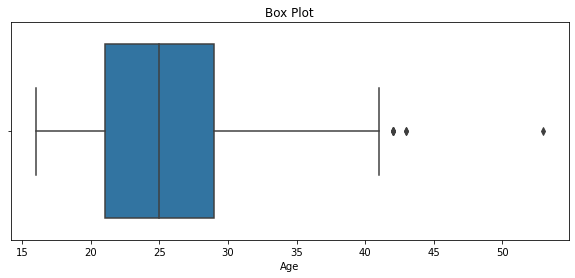

In [51]:
def Box_plots(df, title_plot):
    plt.figure(figsize=(10, 4))
    plt.title(title_plot)
    sns.boxplot(df)
    plt.show()
Box_plots(df2['Age'], 'Box Plot')

The boxplot above shows that the column Age has outliners

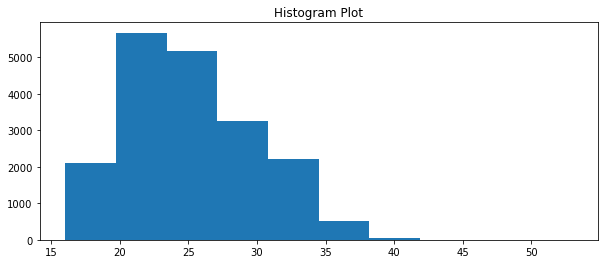

In [52]:
def hist_plots(df, title):
    plt.figure(figsize=(10, 4))
    plt.hist(df)
    plt.title(title)
    plt.show()
hist_plots(df2['Age'], 'Histogram Plot')

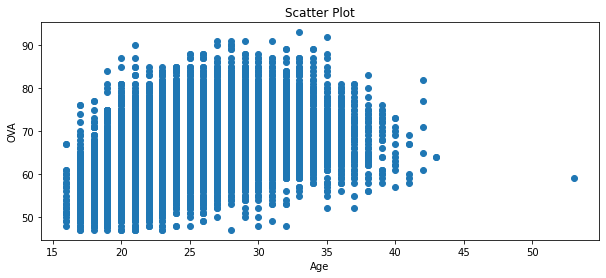

In [53]:
def scatter_plots(df1,df2, title_plot):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.scatter(df1,df2)
    ax.set_xlabel('Age')
    ax.set_ylabel('OVA')
    plt.title(title_plot)
    plt.show()
scatter_plots(df2['Age'],df2['↓OVA'], 'Scatter Plot')

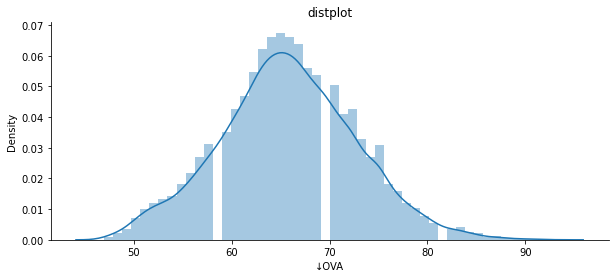

In [54]:
def dist_plots(df, title):
    plt.figure(figsize=(10, 4))
    sns.distplot(df)
    plt.title(title)
    sns.despine()
    plt.show()
dist_plots(df2['↓OVA'], 'distplot')

<Figure size 720x288 with 0 Axes>

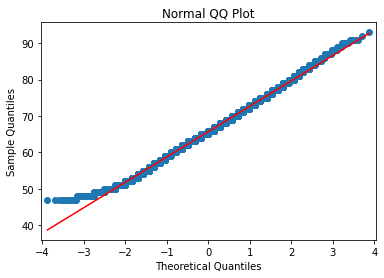

In [55]:
def qq_plots(df, title):
    plt.figure(figsize=(10, 4))
    qqplot(df,line='s')
    plt.title(title)
    plt.show()
qq_plots(df2['↓OVA'], 'Normal QQ Plot')

Let's define a function for dropping Outliners

In [56]:
def drop_outliner(data, column):
    
    #Box plot showing the data before removing OUTLINERS
    Box_plots(data[column], 'Box Plot with Outliners')
    
    #let's define the IQR for the data in the column
    iqr = np.percentile(data[column], 75) - np.percentile(data[column], 25)
    #Next we drop rows that are below or above the iqr * 1.5 for each of the column in the data
    data.drop(data[data[column] > ((iqr *1.5) + np.percentile(data[column], 75))].index, inplace=True)
    data.drop(data[data[column] < (np.percentile(data[column], 25) - (iqr *1.5))].index, inplace=True)
    
    #Box plot showing the data after removing OUTLINERS
    Box_plots(data[column], 'Box Plot without Outliners')

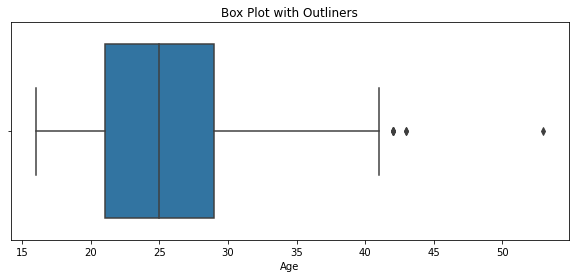

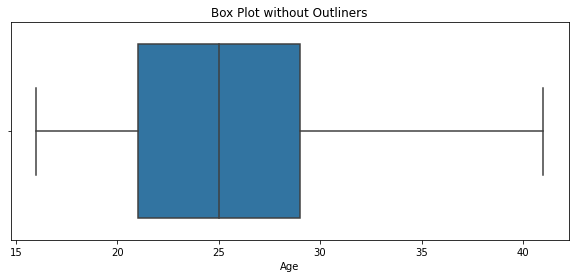

In [57]:
drop_outliner(df2, 'Age')

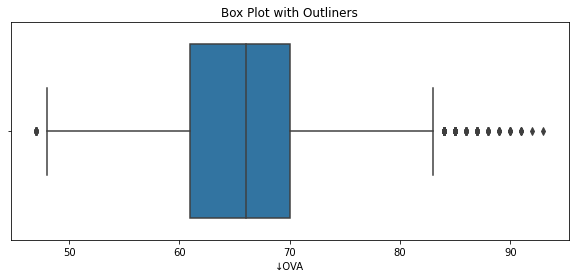

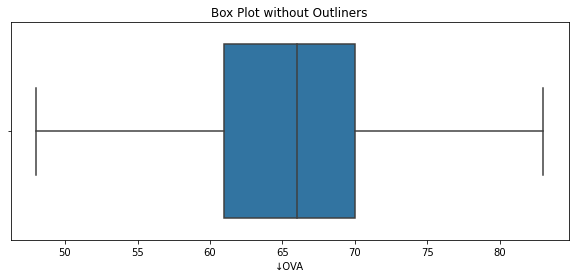

In [58]:
drop_outliner(df2, '↓OVA')

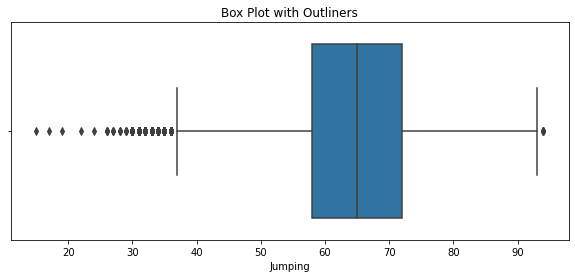

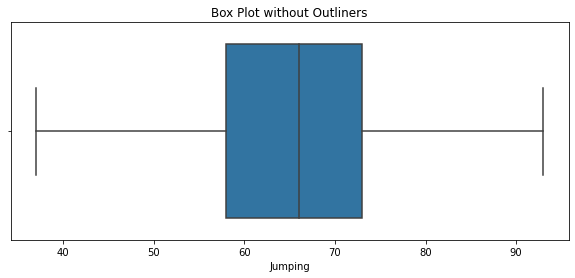

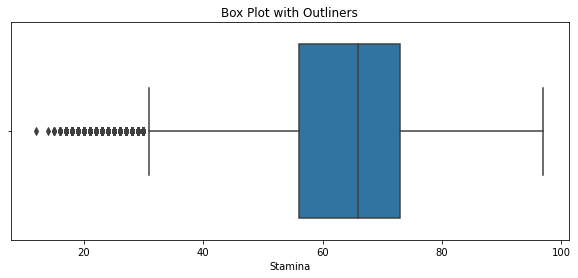

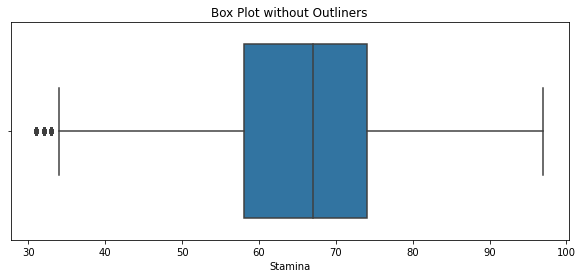

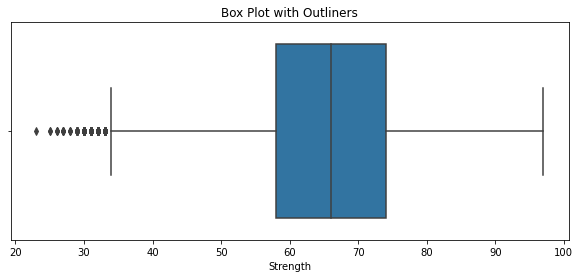

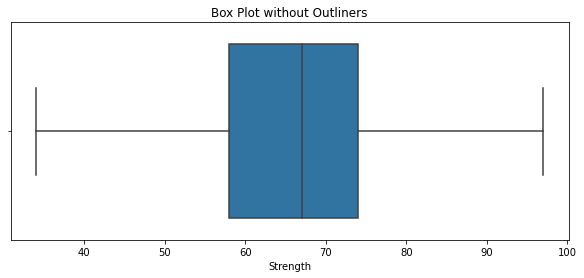

In [59]:
drop_outliner(df2, 'Jumping')
drop_outliner(df2, 'Stamina')
drop_outliner(df2, 'Strength')

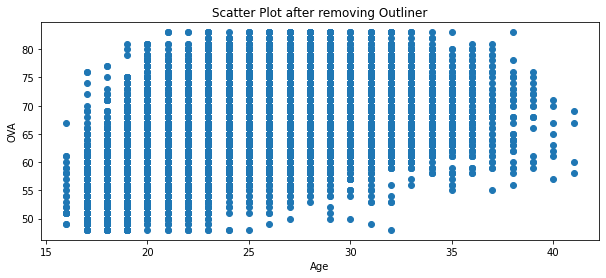

In [60]:
scatter_plots(df2['Age'],df2['↓OVA'], 'Scatter Plot after removing Outliner')

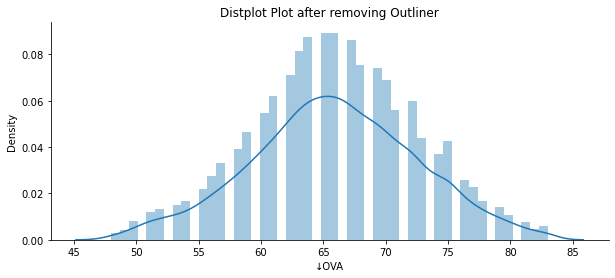

In [61]:
dist_plots(df2['↓OVA'], 'Distplot Plot after removing Outliner')

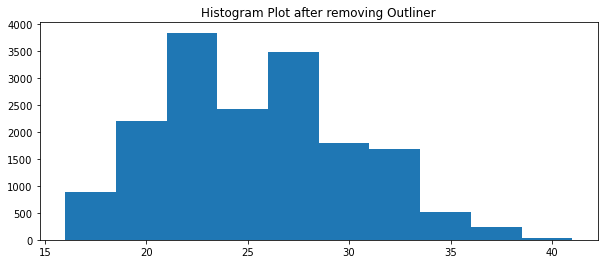

In [62]:
hist_plots(df2['Age'], 'Histogram Plot after removing Outliner')

<Figure size 720x288 with 0 Axes>

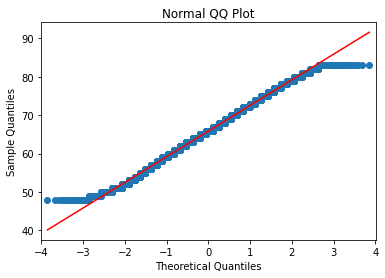

In [63]:
qq_plots(df2['↓OVA'], 'Normal QQ Plot')

In [64]:
df2

,ID,LongName,Nationality,Age,↓OVA,POT,Club,Positions,Height(CM),Weight(Kg),Preferred Foot,BOV,Best Position,Joined,Value(€),Wage(€),Release Clause(€),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F(★),SM(★),A/W,D/W,IR(★),PAC,SHO,PAS,DRI,DEF,PHY,Hits,Contract Expiry Year
142,235212,Achraf Hakimi,Morocco,21,83,88,Inter,RM,181,73,Right,84,RM,2020/09/09,56000000,90000,€62.1M,358,81,73,63,81,60,362,84,68,55,72,83,420,93,95,77,81,74,374,77,75,86,73,63,345,72,78,75,74,46,79,217,67,74,76,46,10,8,14,6,8,2122,470,2,3,High,Medium,1 ★,94,70,76,82,72,76,459,2025
143,228618,Ferland Mendy,France,25,83,88,Real Madrid,LB,180,73,Left,83,LB,2019/07/01,49500000,160000,€64.8M,343,78,63,72,80,50,343,80,72,35,78,78,423,91,92,80,82,78,378,69,78,88,79,64,365,82,79,80,75,49,78,238,77,81,80,51,7,16,9,10,9,2141,471,5,4,High,High,1 ★,92,64,76,79,78,82,282,2025
144,231443,Ousmane Dembélé,France,23,83,89,FC Barcelona,"LW, RW",178,67,Left,85,LM,2017/08/28,57500000,175000,€79.9M,353,81,75,43,78,76,395,89,82,64,76,84,433,93,92,89,78,81,336,83,58,68,51,76,318,54,36,77,76,75,80,105,42,30,33,49,6,6,14,10,13,1989,425,5,5,High,Medium,3 ★,92,77,77,87,36,56,657,2022
145,203486,Thorgan Hazard,Belgium,27,83,83,Borussia Dortmund,"LM, RM, CF",175,71,Right,83,LM,2019/07/01,38500000,79000,€45.9M,358,81,76,39,82,80,407,86,83,81,73,84,430,86,83,91,82,88,360,78,60,80,65,77,365,57,63,81,83,81,78,150,56,46,48,37,6,9,7,7,8,2107,447,4,4,High,High,2 ★,84,77,81,86,52,67,121,2024
146,230481,Ronaldo Jailson Cabrais Petri,Brazil,28,83,83,Grêmio,"CAM, RM",177,75,Right,84,RM,2019/01/01,36500000,49000,€49.4M,380,83,74,64,83,76,414,85,86,78,82,83,418,90,87,86,84,71,385,82,69,88,68,78,344,62,40,82,83,77,81,92,24,35,33,65,12,12,13,15,13,2098,439,4,4,Medium,Low,1 ★,88,77,83,84,35,72,51,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18959,252549,Jay Bird,England,19,48,63,Milton Keynes Dons,ST,186,70,Right,50,ST,2019/07/01,110000,1000,€143K,214,33,53,47,42,39,186,45,37,30,30,44,299,64,68,62,46,59,265,44,61,61,56,43,181,32,13,43,41,52,42,44,16,10,18,59,13,12,11,15,8,1248,268,3,2,Medium,Medium,1 ★,66,48,37,47,17,53,0,2021
18960,251263,Laurence Smith,England,19,48,65,Fleetwood Town,RM,180,67,Right,49,RM,2019/05/10,120000,900,€143K,191,46,33,30,40,42,209,51,40,32,41,45,282,61,63,57,41,60,232,47,43,52,49,41,188,33,18,41,49,47,43,89,20,30,39,38,7,9,7,9,6,1229,266,2,2,Medium,Medium,1 ★,62,39,43,50,26,46,0,2021
18961,241274,Liam Waldock,England,19,48,65,Sheffield Wednesday,CM,178,64,Right,50,CAM,2017/09/25,120000,2000,€152K,204,39,31,44,58,32,229,49,40,42,52,46,315,59,62,67,53,74,226,45,62,51,40,28,232,59,45,33,50,45,44,123,42,42,39,43,12,7,7,9,8,1372,287,3,2,Medium,Medium,1 ★,61,34,50,51,43,48,0,2021
18962,256631,Brayan Montaño,Colombia,18,48,67,Deportivo Cali,CB,176,70,Left,50,CB,2020/01/01,110000,500,€119K,137,25,22,44,27,19,128,24,25,25,27,27,263,58,59,49,40,57,238,34,69,57,57,21,187,47,50,28,30,32,42,147,39,55,53,47,8,12,14,6,7,1147,245,2,2,Medium,Medium,1 ★,59,25,27,30,48,56,0,2024


<font size = +2>Handling special Characters and accented names</font>

In [65]:
#import the unidecode library to convert accented characters to plain english alternatives
#identify the columns that have accented characters using the 'dtypes' attribute of the dataframe

In [66]:
from unidecode import unidecode

In [67]:
object_cols = df2.select_dtypes(include=['object']).columns

for col in object_cols:
    df2[col] = df2[col].apply(lambda x: unidecode(x))

In [68]:
df2.to_csv('Cleaned_fifa_file.csv', index = False)
df2

,ID,LongName,Nationality,Age,↓OVA,POT,Club,Positions,Height(CM),Weight(Kg),Preferred Foot,BOV,Best Position,Joined,Value(€),Wage(€),Release Clause(€),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F(★),SM(★),A/W,D/W,IR(★),PAC,SHO,PAS,DRI,DEF,PHY,Hits,Contract Expiry Year
142,235212,Achraf Hakimi,Morocco,21,83,88,Inter,RM,181,73,Right,84,RM,2020/09/09,56000000,90000,EUR62.1M,358,81,73,63,81,60,362,84,68,55,72,83,420,93,95,77,81,74,374,77,75,86,73,63,345,72,78,75,74,46,79,217,67,74,76,46,10,8,14,6,8,2122,470,2,3,High,Medium,1,94,70,76,82,72,76,459,2025
143,228618,Ferland Mendy,France,25,83,88,Real Madrid,LB,180,73,Left,83,LB,2019/07/01,49500000,160000,EUR64.8M,343,78,63,72,80,50,343,80,72,35,78,78,423,91,92,80,82,78,378,69,78,88,79,64,365,82,79,80,75,49,78,238,77,81,80,51,7,16,9,10,9,2141,471,5,4,High,High,1,92,64,76,79,78,82,282,2025
144,231443,Ousmane Dembele,France,23,83,89,FC Barcelona,"LW, RW",178,67,Left,85,LM,2017/08/28,57500000,175000,EUR79.9M,353,81,75,43,78,76,395,89,82,64,76,84,433,93,92,89,78,81,336,83,58,68,51,76,318,54,36,77,76,75,80,105,42,30,33,49,6,6,14,10,13,1989,425,5,5,High,Medium,3,92,77,77,87,36,56,657,2022
145,203486,Thorgan Hazard,Belgium,27,83,83,Borussia Dortmund,"LM, RM, CF",175,71,Right,83,LM,2019/07/01,38500000,79000,EUR45.9M,358,81,76,39,82,80,407,86,83,81,73,84,430,86,83,91,82,88,360,78,60,80,65,77,365,57,63,81,83,81,78,150,56,46,48,37,6,9,7,7,8,2107,447,4,4,High,High,2,84,77,81,86,52,67,121,2024
146,230481,Ronaldo Jailson Cabrais Petri,Brazil,28,83,83,Gremio,"CAM, RM",177,75,Right,84,RM,2019/01/01,36500000,49000,EUR49.4M,380,83,74,64,83,76,414,85,86,78,82,83,418,90,87,86,84,71,385,82,69,88,68,78,344,62,40,82,83,77,81,92,24,35,33,65,12,12,13,15,13,2098,439,4,4,Medium,Low,1,88,77,83,84,35,72,51,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18959,252549,Jay Bird,England,19,48,63,Milton Keynes Dons,ST,186,70,Right,50,ST,2019/07/01,110000,1000,EUR143K,214,33,53,47,42,39,186,45,37,30,30,44,299,64,68,62,46,59,265,44,61,61,56,43,181,32,13,43,41,52,42,44,16,10,18,59,13,12,11,15,8,1248,268,3,2,Medium,Medium,1,66,48,37,47,17,53,0,2021
18960,251263,Laurence Smith,England,19,48,65,Fleetwood Town,RM,180,67,Right,49,RM,2019/05/10,120000,900,EUR143K,191,46,33,30,40,42,209,51,40,32,41,45,282,61,63,57,41,60,232,47,43,52,49,41,188,33,18,41,49,47,43,89,20,30,39,38,7,9,7,9,6,1229,266,2,2,Medium,Medium,1,62,39,43,50,26,46,0,2021
18961,241274,Liam Waldock,England,19,48,65,Sheffield Wednesday,CM,178,64,Right,50,CAM,2017/09/25,120000,2000,EUR152K,204,39,31,44,58,32,229,49,40,42,52,46,315,59,62,67,53,74,226,45,62,51,40,28,232,59,45,33,50,45,44,123,42,42,39,43,12,7,7,9,8,1372,287,3,2,Medium,Medium,1,61,34,50,51,43,48,0,2021
18962,256631,Brayan Montano,Colombia,18,48,67,Deportivo Cali,CB,176,70,Left,50,CB,2020/01/01,110000,500,EUR119K,137,25,22,44,27,19,128,24,25,25,27,27,263,58,59,49,40,57,238,34,69,57,57,21,187,47,50,28,30,32,42,147,39,55,53,47,8,12,14,6,7,1147,245,2,2,Medium,Medium,1,59,25,27,30,48,56,0,2024


<font size=+2>Conclusion</font>

The messy data has been successfully transformed into a clean data by ensuring names(players/clubs/team) are rightly spelt, the fumerical figures were converted to whole numbers, filled NaN values, dealt with inconsistent data types and finally outliners.

The resulting data was then extracted as 'Cleaned_fifa_file.csv'.